In [1]:
include("../../juliasrc/calculate_potentials.jl");

 Activating environment at `~/Projects/bpm-e34/Project.toml`


In [2]:
Threads.nthreads()

32

In [3]:
a = zeros(100)
Threads.@threads for i = 1:100

    a[i] = Threads.threadid()
end

In [4]:
a

100-element Array{Float64,1}:
  1.0
  1.0
  1.0
  1.0
  2.0
  2.0
  2.0
  2.0
  3.0
  3.0
  3.0
  3.0
  4.0
  ⋮
 29.0
 29.0
 29.0
 30.0
 30.0
 30.0
 31.0
 31.0
 31.0
 32.0
 32.0
 32.0

In [5]:
test_sample = [get_random_distorted_gaussian_beam() for i in 1:500];

In [6]:
test_sample_targets = []

for test in test_sample
    target = MinimizationTarget(test)
    push!(test_sample_targets, target)
end

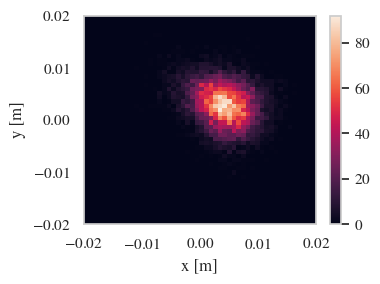

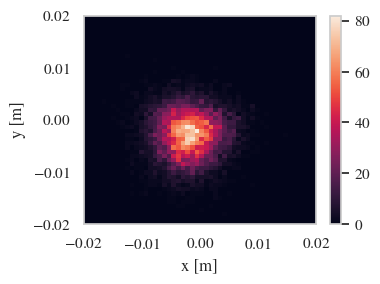

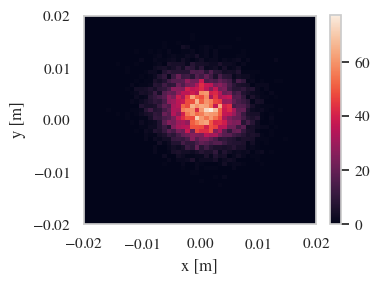

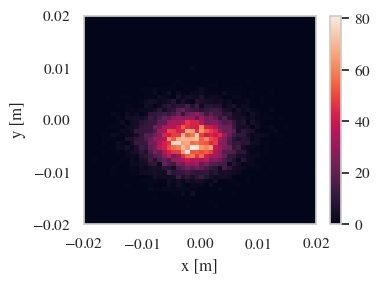

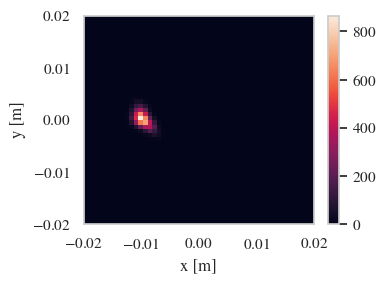

5-element Array{Nothing,1}:
 nothing
 nothing
 nothing
 nothing
 nothing

In [7]:
[plot(i) for i in test_sample[1:5]]

In [8]:
# 1e3 works ok
function mse(a::MinimizationTarget, b::MinimizationTarget)
    currents =  mean(@. (a.currents - b.currents)^2)
    return exp(1e5*(a.std_x - b.std_x)^2) - 1 + exp(1e5*(a.std_y - b.std_y)^2) -1 + currents
end


mse (generic function with 2 methods)

In [9]:
test_sample_targets_with_noise = []
noise_levels = [0.0, 0.1, 0.2, 0.3]
for target in test_sample_targets
    
    target_with_noise = MinimizationTarget[]
    for noise in noise_levels
        target2 = deepcopy(target)
        target2.std_x *= (1.0 + noise)
        target2.std_y *= (1.0 + noise)
        push!(target_with_noise, target2)
    end
    push!(test_sample_targets_with_noise, target_with_noise)
end

In [10]:
size(test_sample_targets_with_noise)

(500,)

In [11]:
# test_sample_targets_with_noise[Test sample number][noise level]
test_sample_targets_with_noise[1][1]

MinimizationTarget(3.1680239839259484e-5, 2.129504155957539e-5, [1.479978721045736, 1.61706367834029, 1.2165688603583957, 0.8224323547227028, 0.6087873909445938, 0.5658392700894194, 0.6678136415658701, 0.9726376959693539])

In [12]:
function dummy_fit(minimization_target::MinimizationTarget, error_function=mse)
    parallel_instances = 16*10
    abs_tolerance = 100e-6

    initial_guess = ones(2, 10000) .* minimization_target.std_x
    
    total_candidate_solutions = CandidateSolution[]
    
    push!(total_candidate_solutions, CandidateSolution(initial_guess, 1.0))
    push!(total_candidate_solutions, CandidateSolution(initial_guess, 1.0))
    
    return total_candidate_solutions
end

dummy_fit (generic function with 2 methods)

# Noise on the $<X> and <Y>$

In [13]:
using CSV, DataFrames

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1260


In [16]:
fitting_results = []

for i in 1:length(test_sample_targets_with_noise)
    println(i)
    println()
    one_sample = []
    for j in 1:length(test_sample_targets_with_noise[i])
        # push!(one_sample, dummy_fit(test_sample_targets_with_noise[i][j])[1])

        push!(one_sample, genetic_mutation_fit(test_sample_targets_with_noise[i][j])[1])
    end
    push!(fitting_results, one_sample)
    
    CSV.write("2020.05.29 data/testsamples/$i.csv",  DataFrame(test_sample[i]), writeheader=false)
    
    CSV.write("2020.05.29 data/std_noise/0/$i.csv",  DataFrame(fitting_results[i][1].beam), writeheader=false)
    CSV.write("2020.05.29 data/std_noise/10/$i.csv",  DataFrame(fitting_results[i][2].beam), writeheader=false)
    CSV.write("2020.05.29 data/std_noise/20/$i.csv",  DataFrame(fitting_results[i][3].beam), writeheader=false)
    CSV.write("2020.05.29 data/std_noise/30/$i.csv",  DataFrame(fitting_results[i][4].beam), writeheader=false)
    
end

1



Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


2



Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28


3



Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


4



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


5



Progress: 100%|█████████████████████████████████████████| Time: 0:01:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


6



Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:53
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:00:53


7



Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23


8



Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:41


9



Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


10



Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01


11



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14


12



Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34


13



Progress: 100%|█████████████████████████████████████████| Time: 0:01:55
Progress: 100%|█████████████████████████████████████████| Time: 0:01:52
Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:57


14



Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23


15



Progress: 100%|█████████████████████████████████████████| Time: 0:00:54
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57


16



Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


17



Progress: 100%|█████████████████████████████████████████| Time: 0:03:20
Progress: 100%|█████████████████████████████████████████| Time: 0:03:20
Progress: 100%|█████████████████████████████████████████| Time: 0:03:28
Progress: 100%|█████████████████████████████████████████| Time: 0:03:38


18



Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


19



Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


20



Progress: 100%|█████████████████████████████████████████| Time: 0:02:21
Progress: 100%|█████████████████████████████████████████| Time: 0:02:14
Progress: 100%|█████████████████████████████████████████| Time: 0:02:17
Progress: 100%|█████████████████████████████████████████| Time: 0:02:13


21



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24


22



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56


23



Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13


24



Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:46
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


25



Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


26



Progress: 100%|█████████████████████████████████████████| Time: 0:01:57
Progress: 100%|█████████████████████████████████████████| Time: 0:02:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:01:46


27



Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08


28



Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


29



Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15


30



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


31



Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19


32



Progress: 100%|█████████████████████████████████████████| Time: 0:01:57
Progress: 100%|█████████████████████████████████████████| Time: 0:02:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:02:04


33



Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29


34



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23


35



Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


36



Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38


37



Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25


38



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


39



Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01


40



Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18


41



Progress: 100%|█████████████████████████████████████████| Time: 0:01:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:01:43
Progress: 100%|█████████████████████████████████████████| Time: 0:01:53


42



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19


43



Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:41


44



Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57


45



Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24


46



Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


47



Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25


48



Progress: 100%|█████████████████████████████████████████| Time: 0:02:10
Progress: 100%|█████████████████████████████████████████| Time: 0:02:00
Progress: 100%|█████████████████████████████████████████| Time: 0:01:54
Progress: 100%|█████████████████████████████████████████| Time: 0:01:58


49



Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06


50



Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14


51



Progress: 100%|█████████████████████████████████████████| Time: 0:02:53
Progress: 100%|█████████████████████████████████████████| Time: 0:02:20
Progress: 100%|█████████████████████████████████████████| Time: 0:02:16
Progress: 100%|█████████████████████████████████████████| Time: 0:02:30


52



Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


53



Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57
Progress: 100%|█████████████████████████████████████████| Time: 0:00:54


54



Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:31


55



Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:43
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


56



Progress: 100%|█████████████████████████████████████████| Time: 0:01:47
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34


57



Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:31


58



Progress: 100%|█████████████████████████████████████████| Time: 0:02:21
Progress: 100%|█████████████████████████████████████████| Time: 0:02:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:55
Progress: 100%|█████████████████████████████████████████| Time: 0:02:00


59



Progress: 100%|█████████████████████████████████████████| Time: 0:01:57
Progress: 100%|█████████████████████████████████████████| Time: 0:01:59
Progress: 100%|█████████████████████████████████████████| Time: 0:02:08
Progress: 100%|█████████████████████████████████████████| Time: 0:02:01


60



Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


61



Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:00


62



Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24


63



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28


64



Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35


65



Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15


66



Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


67



Progress: 100%|█████████████████████████████████████████| Time: 0:02:06
Progress: 100%|█████████████████████████████████████████| Time: 0:02:05
Progress: 100%|█████████████████████████████████████████| Time: 0:02:08
Progress: 100%|█████████████████████████████████████████| Time: 0:02:05


68



Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


69



Progress: 100%|█████████████████████████████████████████| Time: 0:01:57
Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:02:09
Progress: 100%|█████████████████████████████████████████| Time: 0:02:20


70



Progress: 100%|█████████████████████████████████████████| Time: 0:00:58
Progress: 100%|█████████████████████████████████████████| Time: 0:00:52
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55
Progress: 100%|█████████████████████████████████████████| Time: 0:00:58


71



Progress: 100%|█████████████████████████████████████████| Time: 0:01:55
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:47
Progress: 100%|█████████████████████████████████████████| Time: 0:01:39


72



Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


73



Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:02:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42


74



Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34


75



Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32


76



Progress: 100%|█████████████████████████████████████████| Time: 0:02:23
Progress: 100%|█████████████████████████████████████████| Time: 0:02:50
Progress: 100%|█████████████████████████████████████████| Time: 0:02:33
Progress: 100%|█████████████████████████████████████████| Time: 0:02:24


77



Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:02:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:02:09


78



Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:02:04
Progress: 100%|█████████████████████████████████████████| Time: 0:02:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:55


79



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09


80



Progress: 100%|█████████████████████████████████████████| Time: 0:00:58
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04


81



Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02


82



Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


83



Progress: 100%|█████████████████████████████████████████| Time: 0:02:21
Progress: 100%|█████████████████████████████████████████| Time: 0:02:28
Progress: 100%|█████████████████████████████████████████| Time: 0:02:22
Progress: 100%|█████████████████████████████████████████| Time: 0:02:48


84



Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


85



Progress: 100%|█████████████████████████████████████████| Time: 0:01:50
Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:02:07


86



Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23


87



Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40


88



Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:53


89



Progress: 100%|█████████████████████████████████████████| Time: 0:00:52
Progress: 100%|█████████████████████████████████████████| Time: 0:00:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03


90



Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:02:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40


91



Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


92



Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:43
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23


93



Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:54


94



Progress: 100%|█████████████████████████████████████████| Time: 0:02:05
Progress: 100%|█████████████████████████████████████████| Time: 0:02:20
Progress: 100%|█████████████████████████████████████████| Time: 0:02:05
Progress: 100%|█████████████████████████████████████████| Time: 0:02:50


95



Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


96



Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:00:58


97



Progress: 100%|█████████████████████████████████████████| Time: 0:00:52
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57


98



Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17


99



Progress: 100%|█████████████████████████████████████████| Time: 0:02:28
Progress: 100%|█████████████████████████████████████████| Time: 0:02:28
Progress: 100%|█████████████████████████████████████████| Time: 0:02:35
Progress: 100%|█████████████████████████████████████████| Time: 0:02:28


100



Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32


101



Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10


102



Progress: 100%|█████████████████████████████████████████| Time: 0:00:52
Progress: 100%|█████████████████████████████████████████| Time: 0:00:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:00:52


103



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26


104



Progress: 100%|█████████████████████████████████████████| Time: 0:02:47
Progress: 100%|█████████████████████████████████████████| Time: 0:02:35
Progress: 100%|█████████████████████████████████████████| Time: 0:02:51
Progress: 100%|█████████████████████████████████████████| Time: 0:02:15


105



Progress: 100%|█████████████████████████████████████████| Time: 0:01:43
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


106



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07


107



Progress: 100%|█████████████████████████████████████████| Time: 0:01:57
Progress: 100%|█████████████████████████████████████████| Time: 0:02:08
Progress: 100%|█████████████████████████████████████████| Time: 0:02:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:46


108



Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23


109



Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


110



Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19


111



Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22


112



Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08


113



Progress: 100%|█████████████████████████████████████████| Time: 0:01:46
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:43


114



Progress: 100%|█████████████████████████████████████████| Time: 0:02:21
Progress: 100%|█████████████████████████████████████████| Time: 0:02:31
Progress: 100%|█████████████████████████████████████████| Time: 0:02:31
Progress: 100%|█████████████████████████████████████████| Time: 0:02:11


115



Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:56
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:53


116



Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07


117



Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:52


118



Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57


119



Progress: 100%|█████████████████████████████████████████| Time: 0:02:39
Progress: 100%|█████████████████████████████████████████| Time: 0:02:17
Progress: 100%|█████████████████████████████████████████| Time: 0:02:19
Progress: 100%|█████████████████████████████████████████| Time: 0:02:48


120



Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23


121



Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08


122



Progress: 100%|█████████████████████████████████████████| Time: 0:02:23
Progress: 100%|█████████████████████████████████████████| Time: 0:02:07
Progress: 100%|█████████████████████████████████████████| Time: 0:02:36
Progress: 100%|█████████████████████████████████████████| Time: 0:02:32


123



Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37


124



Progress: 100%|█████████████████████████████████████████| Time: 0:01:47
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35


125



Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10


126



Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23


127



Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:00:58


128



Progress: 100%|█████████████████████████████████████████| Time: 0:02:19
Progress: 100%|█████████████████████████████████████████| Time: 0:02:47
Progress: 100%|█████████████████████████████████████████| Time: 0:02:21
Progress: 100%|█████████████████████████████████████████| Time: 0:02:12


129



Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24


130



Progress: 100%|█████████████████████████████████████████| Time: 0:01:55
Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


131



Progress: 100%|█████████████████████████████████████████| Time: 0:02:39
Progress: 100%|█████████████████████████████████████████| Time: 0:02:22
Progress: 100%|█████████████████████████████████████████| Time: 0:02:29
Progress: 100%|█████████████████████████████████████████| Time: 0:02:30


132



Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32


133



Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37


134



Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20


135



Progress: 100%|█████████████████████████████████████████| Time: 0:01:50
Progress: 100%|█████████████████████████████████████████| Time: 0:01:52
Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34


136



Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15


137



Progress: 100%|█████████████████████████████████████████| Time: 0:02:38
Progress: 100%|█████████████████████████████████████████| Time: 0:02:42
Progress: 100%|█████████████████████████████████████████| Time: 0:03:00
Progress: 100%|█████████████████████████████████████████| Time: 0:02:48


138



Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32


139



Progress: 100%|█████████████████████████████████████████| Time: 0:01:39
Progress: 100%|█████████████████████████████████████████| Time: 0:01:39
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25


140



Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:00:49


141



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06


142



Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19


143



Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08


144



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


145



Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:01:55


146



Progress: 100%|█████████████████████████████████████████| Time: 0:01:56
Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48


147



Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09


148



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14


149



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20


150



Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:55
Progress: 100%|█████████████████████████████████████████| Time: 0:01:57


151



Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10


152



Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28


153



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24


154



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


155



Progress: 100%|█████████████████████████████████████████| Time: 0:01:50
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28


156



Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32


157



Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:43
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


158



Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24


159



Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


160



Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14


161



Progress: 100%|█████████████████████████████████████████| Time: 0:00:54
Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01


162



Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20


163



Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:00


164



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:00:47
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:00:48


165



Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


166



Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25


167



Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18


168



Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48


169



Progress: 100%|█████████████████████████████████████████| Time: 0:02:43
Progress: 100%|█████████████████████████████████████████| Time: 0:02:26
Progress: 100%|█████████████████████████████████████████| Time: 0:02:31
Progress: 100%|█████████████████████████████████████████| Time: 0:02:39


170



Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


171



Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57
Progress: 100%|█████████████████████████████████████████| Time: 0:00:53
Progress: 100%|█████████████████████████████████████████| Time: 0:00:51


172



Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


173



Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28


174



Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:58


175



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


176



Progress: 100%|█████████████████████████████████████████| Time: 0:02:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


177



Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14


178



Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37


179



Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45


180



Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28


181



Progress: 100%|█████████████████████████████████████████| Time: 0:02:05
Progress: 100%|█████████████████████████████████████████| Time: 0:02:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:01:55


182



Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:02:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:57
Progress: 100%|█████████████████████████████████████████| Time: 0:02:21


183



Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55


184



Progress: 100%|█████████████████████████████████████████| Time: 0:01:43
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23


185



Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34


186



Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:01:41


187



Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:51
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59


188



Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:54


189



Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18


190



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


191



Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42


192



Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09


193



Progress: 100%|█████████████████████████████████████████| Time: 0:01:39
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18


194



Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10


195



Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:00:51
Progress: 100%|█████████████████████████████████████████| Time: 0:00:49


196



Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17


197



Progress: 100%|█████████████████████████████████████████| Time: 0:02:12
Progress: 100%|█████████████████████████████████████████| Time: 0:02:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:01:57


198



Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:39


199



Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:47
Progress: 100%|█████████████████████████████████████████| Time: 0:01:53


200



Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:01:58


201



Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24


202



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


203



Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:31


204



Progress: 100%|█████████████████████████████████████████| Time: 0:02:17
Progress: 100%|█████████████████████████████████████████| Time: 0:02:14
Progress: 100%|█████████████████████████████████████████| Time: 0:02:00
Progress: 100%|█████████████████████████████████████████| Time: 0:02:16


205



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29


206



Progress: 100%|█████████████████████████████████████████| Time: 0:02:47
Progress: 100%|█████████████████████████████████████████| Time: 0:02:42
Progress: 100%|█████████████████████████████████████████| Time: 0:02:39
Progress: 100%|█████████████████████████████████████████| Time: 0:02:36


207



Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01


208



Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02


209



Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34


210



Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06


211



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14


212



Progress: 100%|█████████████████████████████████████████| Time: 0:01:55
Progress: 100%|█████████████████████████████████████████| Time: 0:01:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:01:58


213



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:39
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:31


214



Progress: 100%|█████████████████████████████████████████| Time: 0:01:39
Progress: 100%|█████████████████████████████████████████| Time: 0:01:47
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33


215



Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


216



Progress: 100%|█████████████████████████████████████████| Time: 0:01:39
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42


217



Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:46


218



Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19


219



Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02


220



Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:46


221



Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


222



Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:00:58


223



Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


224



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45


225



Progress: 100%|█████████████████████████████████████████| Time: 0:02:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:02:04
Progress: 100%|█████████████████████████████████████████| Time: 0:02:01


226



Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


227



Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01


228



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10


229



Progress: 100%|█████████████████████████████████████████| Time: 0:02:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:52
Progress: 100%|█████████████████████████████████████████| Time: 0:01:56


230



Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55


231



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:00:58
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56


232



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14


233



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44


234



Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:00:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07


235



Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:00:54


236



Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:00:47


237



Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02


238



Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34


239



Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37


240



Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08


241



Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29


242



Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17


243



Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:43
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


244



Progress: 100%|█████████████████████████████████████████| Time: 0:00:54
Progress: 100%|█████████████████████████████████████████| Time: 0:00:53
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02


245



Progress: 100%|█████████████████████████████████████████| Time: 0:01:43
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24


246



Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24


247



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:48


248



Progress: 100%|█████████████████████████████████████████| Time: 0:02:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:46
Progress: 100%|█████████████████████████████████████████| Time: 0:01:47
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38


249



Progress: 100%|█████████████████████████████████████████| Time: 0:02:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:36


250



Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28


251



Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09


252



Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56


253



Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10


254



Progress: 100%|█████████████████████████████████████████| Time: 0:00:57
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:54
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09


255



Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19


256



Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34


257



Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28


258



Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06


259



Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:39
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51


260



Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:02:02
Progress: 100%|█████████████████████████████████████████| Time: 0:02:00
Progress: 100%|█████████████████████████████████████████| Time: 0:02:01


261



Progress: 100%|█████████████████████████████████████████| Time: 0:01:55
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:52


262



Progress: 100%|█████████████████████████████████████████| Time: 0:02:24
Progress: 100%|█████████████████████████████████████████| Time: 0:02:10
Progress: 100%|█████████████████████████████████████████| Time: 0:02:05
Progress: 100%|█████████████████████████████████████████| Time: 0:02:07


263



Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37


264



Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:00:53


265



Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


266



Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


267



Progress: 100%|█████████████████████████████████████████| Time: 0:02:41
Progress: 100%|█████████████████████████████████████████| Time: 0:02:42
Progress: 100%|█████████████████████████████████████████| Time: 0:02:53
Progress: 100%|█████████████████████████████████████████| Time: 0:03:13


268



Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32


269



Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:00:54
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55


270



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


271



Progress: 100%|█████████████████████████████████████████| Time: 0:02:51
Progress: 100%|█████████████████████████████████████████| Time: 0:02:58
Progress: 100%|█████████████████████████████████████████| Time: 0:03:27
Progress: 100%|█████████████████████████████████████████| Time: 0:02:47


272



Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17


273



Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25


274



Progress: 100%|█████████████████████████████████████████| Time: 0:00:55
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07


275



Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14


276



Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


277



Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:50
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48


278



Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25


279



Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22


280



Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:46
Progress: 100%|█████████████████████████████████████████| Time: 0:01:53


281



Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20


282



Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:43
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26


283



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18


284



Progress: 100%|█████████████████████████████████████████| Time: 0:01:52
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:55
Progress: 100%|█████████████████████████████████████████| Time: 0:02:13


285



Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:55
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:50


286



Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32


287



Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:39


288



Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32


289



Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:56
Progress: 100%|█████████████████████████████████████████| Time: 0:02:00


290



Progress: 100%|█████████████████████████████████████████| Time: 0:01:52
Progress: 100%|█████████████████████████████████████████| Time: 0:02:08
Progress: 100%|█████████████████████████████████████████| Time: 0:02:08
Progress: 100%|█████████████████████████████████████████| Time: 0:02:03


291



Progress: 100%|█████████████████████████████████████████| Time: 0:01:39
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48


292



Progress: 100%|█████████████████████████████████████████| Time: 0:01:55
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40


293



Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35


294



Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33


295



Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44


296



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


297



Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:00:58


298



Progress: 100%|█████████████████████████████████████████| Time: 0:02:44
Progress: 100%|█████████████████████████████████████████| Time: 0:02:26
Progress: 100%|█████████████████████████████████████████| Time: 0:02:26
Progress: 100%|█████████████████████████████████████████| Time: 0:02:54


299



Progress: 100%|█████████████████████████████████████████| Time: 0:00:55
Progress: 100%|█████████████████████████████████████████| Time: 0:00:54
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07


300



Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:00:52


301



Progress: 100%|█████████████████████████████████████████| Time: 0:03:03
Progress: 100%|█████████████████████████████████████████| Time: 0:02:40
Progress: 100%|█████████████████████████████████████████| Time: 0:02:33
Progress: 100%|█████████████████████████████████████████| Time: 0:02:34


302



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18


303



Progress: 100%|█████████████████████████████████████████| Time: 0:01:52
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48


304



Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:02:00
Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32


305



Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:02:01


306



Progress: 100%|█████████████████████████████████████████| Time: 0:02:45
Progress: 100%|█████████████████████████████████████████| Time: 0:03:05
Progress: 100%|█████████████████████████████████████████| Time: 0:02:22
Progress: 100%|█████████████████████████████████████████| Time: 0:02:06


307



Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04


308



Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22


309



Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:00:58
Progress: 100%|█████████████████████████████████████████| Time: 0:00:49


310



Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55


311



Progress: 100%|█████████████████████████████████████████| Time: 0:04:41
Progress: 100%|█████████████████████████████████████████| Time: 0:04:15
Progress: 100%|█████████████████████████████████████████| Time: 0:04:53
Progress: 100%|█████████████████████████████████████████| Time: 0:04:26


312



Progress: 100%|█████████████████████████████████████████| Time: 0:01:46
Progress: 100%|█████████████████████████████████████████| Time: 0:02:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:54
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45


313



Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07


314



Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:02:01


315



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20


316



Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55


317



Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20


318



Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15


319



Progress: 100%|█████████████████████████████████████████| Time: 0:00:58
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57
Progress: 100%|█████████████████████████████████████████| Time: 0:00:47
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59


320



Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51


321



Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


322



Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


323



Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


324



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38


325



Progress: 100%|█████████████████████████████████████████| Time: 0:01:54
Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:02:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:56


326



Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


327



Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


328



Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:00:52
Progress: 100%|█████████████████████████████████████████| Time: 0:00:54
Progress: 100%|█████████████████████████████████████████| Time: 0:00:53


329



Progress: 100%|█████████████████████████████████████████| Time: 0:01:47
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33


330



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14


331



Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


332



Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


333



Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20


334



Progress: 100%|█████████████████████████████████████████| Time: 0:02:09
Progress: 100%|█████████████████████████████████████████| Time: 0:02:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:52


335



Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


336



Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08


337



Progress: 100%|█████████████████████████████████████████| Time: 0:01:39
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22


338



Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10


339



Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29


340



Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17


341



Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09


342



Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


343



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


344



Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19


345



Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24


346



Progress: 100%|█████████████████████████████████████████| Time: 0:02:43
Progress: 100%|█████████████████████████████████████████| Time: 0:02:36
Progress: 100%|█████████████████████████████████████████| Time: 0:02:51
Progress: 100%|█████████████████████████████████████████| Time: 0:02:22


347



Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:00:54


348



Progress: 100%|█████████████████████████████████████████| Time: 0:01:50
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32


349



Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:41


350



Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25


351



Progress: 100%|█████████████████████████████████████████| Time: 0:03:13
Progress: 100%|█████████████████████████████████████████| Time: 0:03:01
Progress: 100%|█████████████████████████████████████████| Time: 0:02:51
Progress: 100%|█████████████████████████████████████████| Time: 0:02:45


352



Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


353



Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22


354



Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


355



Progress: 100%|█████████████████████████████████████████| Time: 0:00:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:00:51


356



Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44
Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35


357



Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


358



Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14


359



Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19


360



Progress: 100%|█████████████████████████████████████████| Time: 0:01:44
Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:43
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40


361



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05


362



Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


363



Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18


364



Progress: 100%|█████████████████████████████████████████| Time: 0:02:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:50
Progress: 100%|█████████████████████████████████████████| Time: 0:01:57
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35


365



Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


366



Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56


367



Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10


368



Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


369



Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01


370



Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32


371



Progress: 100%|█████████████████████████████████████████| Time: 0:01:57
Progress: 100%|█████████████████████████████████████████| Time: 0:01:46
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:47


372



Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14


373



Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


374



Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44
Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38


375



Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13


376



Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32


377



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


378



Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25


379



Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34


380



Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57


381



Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17


382



Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28


383



Progress: 100%|█████████████████████████████████████████| Time: 0:00:58
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57


384



Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:39


385



Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34


386



Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18


387



Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44
Progress: 100%|█████████████████████████████████████████| Time: 0:01:54


388



Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


389



Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44
Progress: 100%|█████████████████████████████████████████| Time: 0:01:43
Progress: 100%|█████████████████████████████████████████| Time: 0:01:47


390



Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25


391



Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


392



Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18


393



Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19


394



Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


395



Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14


396



Progress: 100%|█████████████████████████████████████████| Time: 0:02:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:57
Progress: 100%|█████████████████████████████████████████| Time: 0:02:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51


397



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02


398



Progress: 100%|█████████████████████████████████████████| Time: 0:02:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:46
Progress: 100%|█████████████████████████████████████████| Time: 0:01:47
Progress: 100%|█████████████████████████████████████████| Time: 0:02:00


399



Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:00:58
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


400



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08


401



Progress: 100%|█████████████████████████████████████████| Time: 0:02:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:02:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:55


402



Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17


403



Progress: 100%|█████████████████████████████████████████| Time: 0:02:13
Progress: 100%|█████████████████████████████████████████| Time: 0:02:15
Progress: 100%|█████████████████████████████████████████| Time: 0:02:27
Progress: 100%|█████████████████████████████████████████| Time: 0:02:24


404



Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33


405



Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22


406



Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:01:46
Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38


407



Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18


408



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20


409



Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:00


410



Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:50


411



Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35


412



Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:58
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57


413



Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37


414



Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:56
Progress: 100%|█████████████████████████████████████████| Time: 0:01:57


415



Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


416



Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:02:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:36


417



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02


418



Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07


419



Progress: 100%|█████████████████████████████████████████| Time: 0:02:51
Progress: 100%|█████████████████████████████████████████| Time: 0:02:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:54


420



Progress: 100%|█████████████████████████████████████████| Time: 0:01:36
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


421



Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:17


422



Progress: 100%|█████████████████████████████████████████| Time: 0:01:42
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40


423



Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:54
Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:47


424



Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02


425



Progress: 100%|█████████████████████████████████████████| Time: 0:02:36
Progress: 100%|█████████████████████████████████████████| Time: 0:02:50
Progress: 100%|█████████████████████████████████████████| Time: 0:02:40
Progress: 100%|█████████████████████████████████████████| Time: 0:02:37


426



Progress: 100%|█████████████████████████████████████████| Time: 0:01:52
Progress: 100%|█████████████████████████████████████████| Time: 0:01:59
Progress: 100%|█████████████████████████████████████████| Time: 0:02:02
Progress: 100%|█████████████████████████████████████████| Time: 0:02:10


427



Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23


428



Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13


429



Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:00:52
Progress: 100%|█████████████████████████████████████████| Time: 0:00:51
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57


430



Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22


431



Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:39
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


432



Progress: 100%|█████████████████████████████████████████| Time: 0:01:44
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:40


433



Progress: 100%|█████████████████████████████████████████| Time: 0:02:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:47
Progress: 100%|█████████████████████████████████████████| Time: 0:01:35


434



Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


435



Progress: 100%|█████████████████████████████████████████| Time: 0:02:27
Progress: 100%|█████████████████████████████████████████| Time: 0:02:30
Progress: 100%|█████████████████████████████████████████| Time: 0:02:36
Progress: 100%|█████████████████████████████████████████| Time: 0:02:41


436



Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05


437



Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:00:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57


438



Progress: 100%|█████████████████████████████████████████| Time: 0:01:50
Progress: 100%|█████████████████████████████████████████| Time: 0:01:47
Progress: 100%|█████████████████████████████████████████| Time: 0:01:57
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51


439



Progress: 100%|█████████████████████████████████████████| Time: 0:01:43
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:45
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42


440



Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


441



Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48
Progress: 100%|█████████████████████████████████████████| Time: 0:01:43


442



Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14


443



Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44


444



Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


445



Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:50
Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:46


446



Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


447



Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02


448



Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15


449



Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34


450



Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10


451



Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:00:49


452



Progress: 100%|█████████████████████████████████████████| Time: 0:01:43
Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:43


453



Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55


454



Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


455



Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25


456



Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


457



Progress: 100%|█████████████████████████████████████████| Time: 0:01:46
Progress: 100%|█████████████████████████████████████████| Time: 0:01:54
Progress: 100%|█████████████████████████████████████████| Time: 0:01:52
Progress: 100%|█████████████████████████████████████████| Time: 0:01:36


458



Progress: 100%|█████████████████████████████████████████| Time: 0:02:08
Progress: 100%|█████████████████████████████████████████| Time: 0:02:08
Progress: 100%|█████████████████████████████████████████| Time: 0:02:17
Progress: 100%|█████████████████████████████████████████| Time: 0:02:14


459



Progress: 100%|█████████████████████████████████████████| Time: 0:01:30
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:47
Progress: 100%|█████████████████████████████████████████| Time: 0:01:32


460



Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13


461



Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19


462



Progress: 100%|█████████████████████████████████████████| Time: 0:01:46
Progress: 100%|█████████████████████████████████████████| Time: 0:01:50
Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:01:57


463



Progress: 100%|█████████████████████████████████████████| Time: 0:01:35
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19
Progress: 100%|█████████████████████████████████████████| Time: 0:01:09


464



Progress: 100%|█████████████████████████████████████████| Time: 0:02:25
Progress: 100%|█████████████████████████████████████████| Time: 0:02:38
Progress: 100%|█████████████████████████████████████████| Time: 0:02:39
Progress: 100%|█████████████████████████████████████████| Time: 0:02:18


465



Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03


466



Progress: 100%|█████████████████████████████████████████| Time: 0:01:53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:55
Progress: 100%|█████████████████████████████████████████| Time: 0:01:52
Progress: 100%|█████████████████████████████████████████| Time: 0:01:44


467



Progress: 100%|█████████████████████████████████████████| Time: 0:02:03
Progress: 100%|█████████████████████████████████████████| Time: 0:02:34
Progress: 100%|█████████████████████████████████████████| Time: 0:02:06
Progress: 100%|█████████████████████████████████████████| Time: 0:02:16


468



Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:39
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07


469



Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:52
Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:02:03


470



Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


471



Progress: 100%|█████████████████████████████████████████| Time: 0:01:40
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:24
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


472



Progress: 100%|█████████████████████████████████████████| Time: 0:02:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:55
Progress: 100%|█████████████████████████████████████████| Time: 0:02:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:48


473



Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07


474



Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
Progress: 100%|█████████████████████████████████████████| Time: 0:02:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:57


475



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10


476



Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


477



Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:00:57


478



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56


479



Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


480



Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10


481



Progress: 100%|█████████████████████████████████████████| Time: 0:01:46
Progress: 100%|█████████████████████████████████████████| Time: 0:01:39
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59


482



Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


483



Progress: 100%|█████████████████████████████████████████| Time: 0:01:34
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26


484



Progress: 100%|█████████████████████████████████████████| Time: 0:02:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29


485



Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


486



Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29


487



Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26


488



Progress: 100%|█████████████████████████████████████████| Time: 0:01:41
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:37


489



Progress: 100%|█████████████████████████████████████████| Time: 0:01:06
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20


490



Progress: 100%|█████████████████████████████████████████| Time: 0:01:09
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18


491



Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
Progress: 100%|█████████████████████████████████████████| Time: 0:01:10
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:15


492



Progress: 100%|█████████████████████████████████████████| Time: 0:01:15
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:19


493



Progress: 100%|█████████████████████████████████████████| Time: 0:02:33
Progress: 100%|█████████████████████████████████████████| Time: 0:02:25
Progress: 100%|█████████████████████████████████████████| Time: 0:02:00
Progress: 100%|█████████████████████████████████████████| Time: 0:02:22


494



Progress: 100%|█████████████████████████████████████████| Time: 0:01:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:07
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05


495



Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:59
Progress: 100%|█████████████████████████████████████████| Time: 0:00:54
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55


496



Progress: 100%|█████████████████████████████████████████| Time: 0:00:51
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
Progress: 100%|█████████████████████████████████████████| Time: 0:00:58
Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


497



Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08


498



Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:23
Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26


499



Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05


500



Progress: 100%|█████████████████████████████████████████| Time: 0:01:46
Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:49
Progress: 100%|█████████████████████████████████████████| Time: 0:01:51


# Noise on the probe readouts

In [137]:
test_sample_targets_with_probe_noise = []
probe_noise_levels = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]

for target in test_sample_targets
    
    target_with_noise = MinimizationTarget[]
    for noise in probe_noise_levels
        target2 = deepcopy(target)
        
        target2.currents = target2.currents .+ randn(8) .* noise .* mean(target2.currents)
        
        push!(target_with_noise, target2)
    end
    push!(test_sample_targets_with_probe_noise, target_with_noise)
end

In [138]:
fitting_results_probe_noise = []

for i in 1:length(test_sample_targets_with_probe_noise)
    one_sample = []
    for j in 1:length(test_sample_targets_with_probe_noise[i])
        push!(one_sample, genetic_mutation_fit(test_sample_targets_with_probe_noise[i][j])[1])
    end
    push!(fitting_results_probe_noise, one_sample)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:02:10
Progress: 100%|█████████████████████████████████████████| Time: 0:02:11
Progress: 100%|█████████████████████████████████████████| Time: 0:02:05
Progress: 100%|█████████████████████████████████████████| Time: 0:02:08
Progress: 100%|█████████████████████████████████████████| Time: 0:02:01
Progress: 100%|█████████████████████████████████████████| Time: 0:02:13
Progress: 100%|█████████████████████████████████████████| Time: 0:02:04
Progress: 100%|█████████████████████████████████████████| Time: 0:02:15
Progress: 100%|█████████████████████████████████████████| Time: 0:02:34
Progress: 100%|█████████████████████████████████████████| Time: 0:03:03
Progress: 100%|█████████████████████████████████████████| Time: 0:02:24
Progress: 100%|█████████████████████████████████████████| Time: 0:03:29
Progress: 100%|█████████████████████████████████████████| Time: 0:02:24
Progress: 100%|█████████████████████████████████████████| Time: 

# Saving Data

In [16]:
for i in eachindex(test_sample)
    CSV.write("2020.05.29 data/testsamples/$i.csv",  DataFrame(test_sample[i]), writeheader=false)
end

In [ ]:
for i in eachindex(fitting_results)
    
    CSV.write("2020.05.29 data/std_noise/0/$i.csv",  DataFrame(fitting_results[i][1].beam), writeheader=false)
    CSV.write("2020.05.29 data/std_noise/10/$i.csv",  DataFrame(fitting_results[i][2].beam), writeheader=false)
    CSV.write("2020.05.29 data/std_noise/20/$i.csv",  DataFrame(fitting_results[i][3].beam), writeheader=false)
    CSV.write("2020.05.29 data/std_noise/30/$i.csv",  DataFrame(fitting_results[i][4].beam), writeheader=false)

end    

In [1]:
fitting_results_probe_noise[1]

UndefVarError: UndefVarError: fitting_results_probe_noise not defined

In [204]:
for i in eachindex(fitting_results_probe_noise)
    
    CSV.write("data/probe_noise/0/$i.csv",  DataFrame(fitting_results_probe_noise[i][1].beam), writeheader=false)
    CSV.write("data/probe_noise/1/$i.csv",  DataFrame(fitting_results_probe_noise[i][2].beam), writeheader=false)
    CSV.write("data/probe_noise/2/$i.csv",  DataFrame(fitting_results_probe_noise[i][3].beam), writeheader=false)
    CSV.write("data/probe_noise/3/$i.csv",  DataFrame(fitting_results_probe_noise[i][4].beam), writeheader=false)
    CSV.write("data/probe_noise/4/$i.csv",  DataFrame(fitting_results_probe_noise[i][5].beam), writeheader=false)
    CSV.write("data/probe_noise/5/$i.csv",  DataFrame(fitting_results_probe_noise[i][6].beam), writeheader=false)

end    